## Data Analysis on Titanic Dataset  
1. Explores and understands the dataset.
2. Performs Exploratory Data Analysis (EDA) using statistics, visualization (plots, histograms, scatter plots, heatmaps).
3. Identifies patterns, correlations, distributions, missing values, and outliers.
4. Summarizes the dataset to gain insights that will guide the next steps.

### Import libraries and Loading the dataset

**Import Libraries**

In [1]:
# Import the required libraries
import numpy as np #for numerical calculations
import pandas as pd #for exploring the dataset
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for drawing attractive and informative statistical graphics

**Load Dataset**

In [2]:
#load the titanic csv file using pandas .read_csv()
dataset = pd.read_csv(r"C:\Users\KOLADE\OneDrive\Documents\Practices\Titanic\data\Titanic-Dataset.csv")
df = dataset.copy() #make a copy of the dataset so i won't tamper with the original dataset

df.info() #load the data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


from the data information, we have 891 rows and 12 columns, there are quantitative and qualitative features, some features have missing values.

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis (EDA)

**Duplicates data**

In [4]:
print(df.duplicated().sum())

0


There are no duplicate data

**Missing Values**

In [5]:
features_nan = [features for features in df.columns if df[features].isnull().sum() > 0]
print(f"Columns with missing values: {features_nan}")

df[features_nan].isnull().mean()

Columns with missing values: ['Age', 'Cabin', 'Embarked']


Age         0.198653
Cabin       0.771044
Embarked    0.002245
dtype: float64

The 'Age', 'Cabin', and 'Embarked' columns has about 20%, 77% and 3% missing values respectively. 

**Numerical Features**

In [6]:
numerical = [features for features in df.columns if df[features].dtypes != "O"]
print(f"Numerical columns = {numerical}")

df[numerical].describe().T

Numerical columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


The PassengerId is just a unique identifier for each passenger and has no predictive value for survival. The Survival is the dependent variable with value 0 and 1 whether a passenger survived or not. And there are also discrete and continuous numerical columns which i will identify and explore respectively. 

**Discrete Data**

Discrete columns = ['Survived', 'Pclass', 'SibSp', 'Parch']



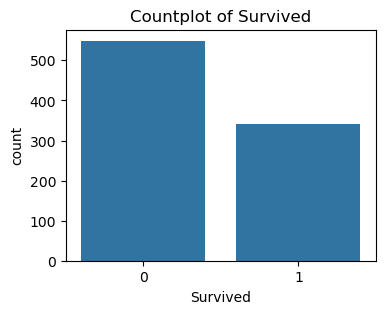

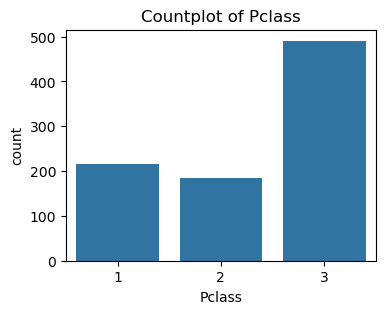

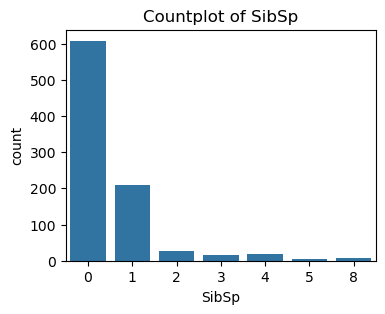

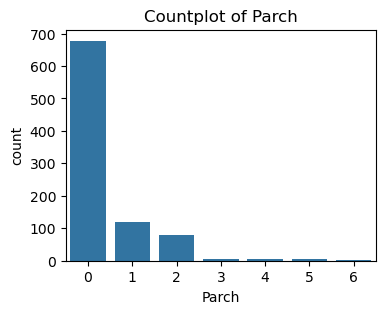

In [7]:
discrete = [features for features in df.columns if features in numerical and df[features].nunique() <= 10 ]
print(f"Discrete columns = {discrete}\n")

for feature in discrete:
    plt.figure(figsize=(4,3))   # new figure for each plot
    sns.countplot(x=df[feature])
    plt.title(f"Countplot of {feature}")
    plt.show()

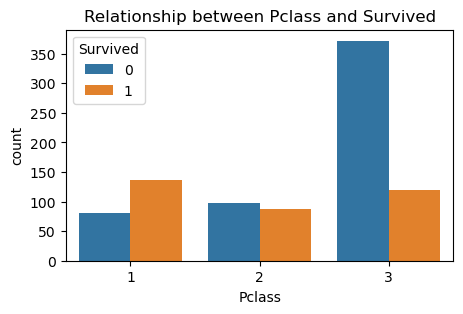

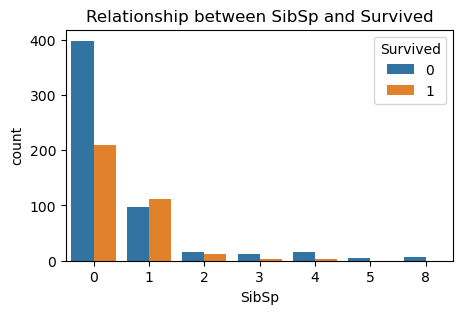

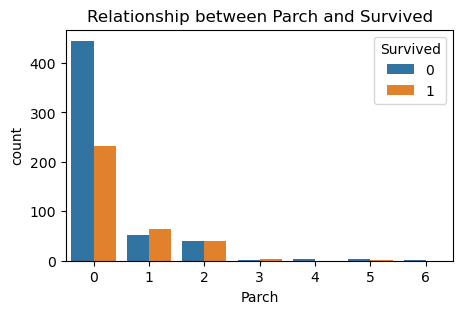

In [8]:
for feature in discrete:
    if feature != 'Survived':
        plt.figure(figsize=(5,3))   # new figure for each plot
        sns.countplot(hue=df['Survived'], x=df[feature])
        plt.title(f"Relationship between {feature} and Survived")
        plt.show()

**Continuous Data**

Continuous Data = ['Age', 'Fare']



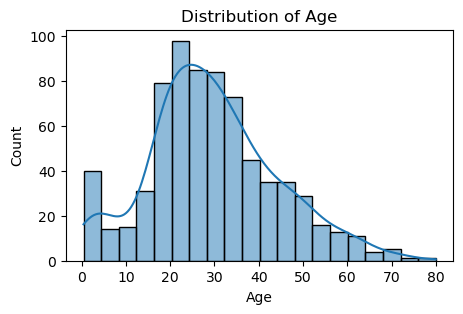

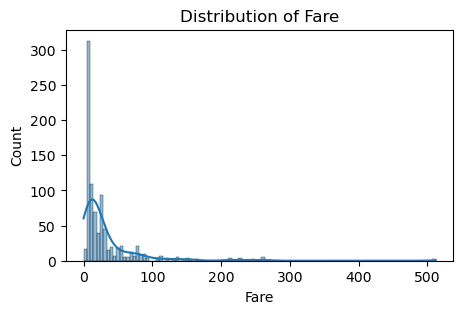

In [9]:
continuous = [features for features in df.columns if features in numerical and features not in discrete+['PassengerId']]
print(f"Continuous Data = {continuous}\n")

for feature in continuous:
    plt.figure(figsize=(5,3))
    sns.histplot(x=df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

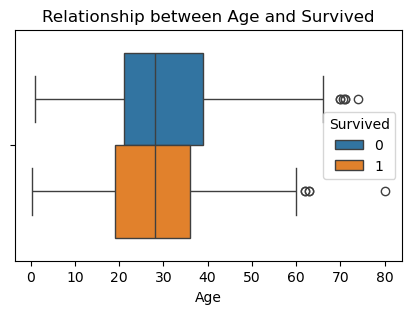

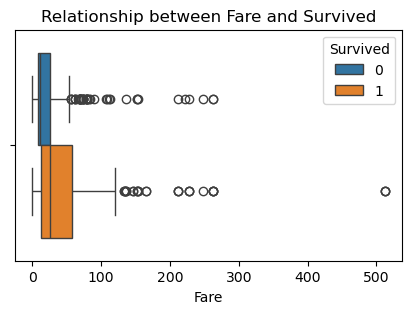

In [10]:
for feature in continuous:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[feature], hue=df['Survived'])
    plt.title(f"Relationship between {feature} and Survived")
    plt.show()

from the discreet and continuous numerical features;  
For the discreet ['Survived', 'Pclass', 'SibSp', 'Parch'] i use the countplot to visualize each features:
1. The passenger who died are more than those who survived
2. Passengers in Pclass 3 are more than the Pclass 1, but I identify that more passengers survived in Pclass 1 than in Pclass 3. Meaning the Pclass 1 are given more attention during rescue.
3. Survival rate decrease as the number of SibSp & Parch increase.

For the continuous ['Age', 'Fare'] i check the distribution of this features using the histogram and boxplot:  
- Most of the Passengers are between the Age 20 - 40, although there are some old passengers above 80. I see from the distribution that the number of passengers above 60 who survived are very small.
- The survival rate of those who paid higher fare is more than those who paid lower fare.

From the analysis I see that some passenger those in first class & those that paid higher fare got good care and attention during rescue while the regular & those that paid lower fare are given less attention and they receive little care.

**Categorical Data**

In [11]:
categorical = [feature for feature in df.columns if df[feature].dtypes == 'O']
print(f"Categorical Data = {categorical}\n")

for feature in categorical:
    if df[feature].nunique() > 5:
        print(f"{feature} has {df[feature].nunique()} unique values")
    else:
        print(f"{feature} has {df[feature].nunique()} unique values which are {df[feature].unique()}")

Categorical Data = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

Name has 891 unique values
Sex has 2 unique values which are ['male' 'female']
Ticket has 681 unique values
Cabin has 147 unique values
Embarked has 3 unique values which are ['S' 'C' 'Q' nan]


In [12]:
df[categorical].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


Categorical Data are ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'] and the 'Sex' and 'Embarked' features has few unique data 2 and 3 respectively. I will explore the distribution of this features using the countplot.


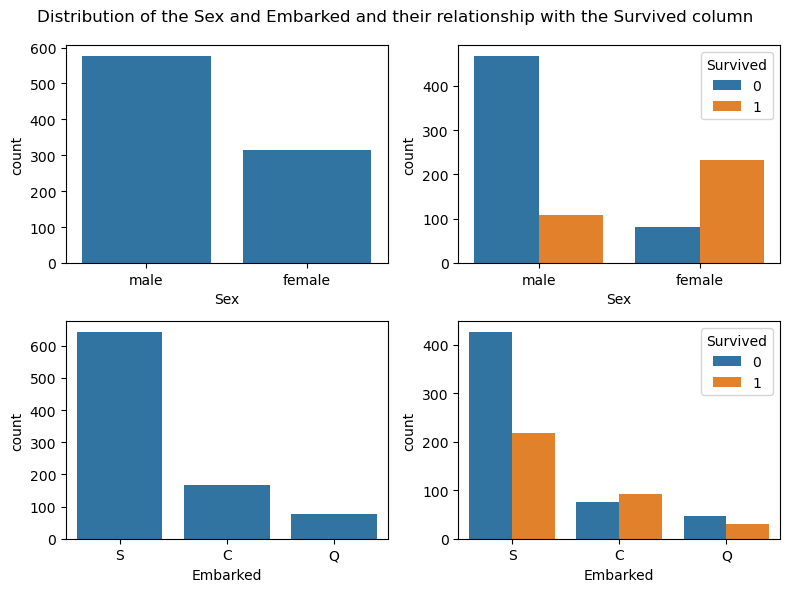

In [13]:
fig, ax = plt.subplots(2,2, figsize=(8, 6))

sns.countplot(x=df['Sex'], ax=ax[0,0])
sns.countplot(x=df['Sex'], hue=df['Survived'], ax=ax[0,1])

sns.countplot(x=df['Embarked'], ax=ax[1,0])
sns.countplot(x=df['Embarked'], hue=df['Survived'], ax=ax[1,1])

plt.suptitle(f"Distribution of the Sex and Embarked and their relationship with the Survived column")

plt.tight_layout()
plt.show()

from the sex: there are more male passenger than the female however the survival rate for the female are higher than that of male.

The embarked feature as well have 3 unique values ['S', 'C', 'Q'], a lot of passengers embarked at S, the survival rate for S is greater than C and C is greater than Q but for C those that survived are greater than those that did not.

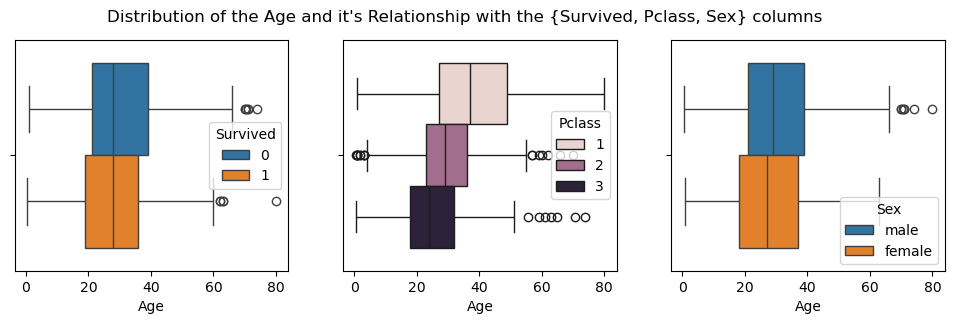

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))

sns.boxplot(x=df['Age'], hue=df['Survived'], ax=ax[0])
sns.boxplot(x=df['Age'], hue=df['Pclass'], ax=ax[1])
sns.boxplot(x=df['Age'], hue=df['Sex'], ax=ax[2])

plt.suptitle("Distribution of the Age and it's Relationship with the {Survived, Pclass, Sex} columns")

fig.savefig("Age_distribution.png")
plt.show()

**Interpretation of the Boxplots**  
1. Plot 1 (Age vs Survived):
- Both survivors (1) and non-survivors (0) have a similar median age (~28–30).
- The spread is also similar, meaning survival did not strongly depend on age.
- Outliers exist on both sides (older passengers).

2. Plot 2 (Age vs Pclass):
- 1st class passengers tend to be older on average (median ~38).
- 2nd class median is lower (~29).
- 3rd class passengers are youngest (median ~24).
- 👉 Age is strongly correlated with Pclass.

3. Plot 3 (Age vs Sex):
- Males have a slightly higher median age (~29–30).
- Females are younger overall (median ~27).
- Distribution looks quite similar otherwise.

**🧮 How to Fill Missing Age Values**  
From the plots, you can see that Age is not missing at random — it depends on Pclass and Sex. So instead of filling with just the overall mean/median, a better strategy is: Fill with median age grouped by Pclass and Sex
>>**df['Age'] = df['Age'].fillna(
    df.groupby(['Pclass', 'Sex'])['Age'].transform('median')
)**

This ensures missing ages for 3rd-class females are filled with the median age of other 3rd-class females, etc. Much more realistic.

### EDA on Family

**Creating a new data "Family" from the Ticket**  
To explore the Survival rate of Family

In [15]:
# df[df['Ticket'].duplicated()]
df[df['Ticket']=='W./C. 6607']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.45,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S


In [16]:
def analyze_titanic_duplicates(df):
    result = {'ticket': [], 'name': [], 'count': [], 'survived': []}

    # Find duplicate tickets
    duplicate_tickets = df[df.duplicated('Ticket', keep=False)]

    # Group by ticket
    grouped = duplicate_tickets.groupby('Ticket')

    for ticket, group in grouped:
        # Get first name from the first entry
        surname = group['Name'].iloc[0].split(',')[0].strip()
        
        # Count duplicates for this ticket
        count = len(group)
        
        # Count how many survived for this ticket
        survived_count = group['Survived'].sum()

        # Append to dictionary
        result['ticket'].append(ticket)
        result['name'].append(surname)
        result['count'].append(count)
        result['survived'].append(survived_count)
    
    return result


In [17]:
pd.DataFrame(analyze_titanic_duplicates(df))

,ticket,name,count,survived
0,110152,Cherry,3,3
1,110413,Taussig,3,2
2,110465,Porter,2,0
3,111361,Hippach,2,2
4,113505,Chibnall,2,2
...,...,...,...,...
129,SC/Paris 2123,Laroche,3,2
130,STON/O2. 3101279,Hakkarainen,2,1
131,W./C. 6607,Johnston,2,0
132,W./C. 6608,Ford,4,0


In [18]:
df[df['Ticket']=='110152']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5,B77,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5,B79,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S


In [19]:
def analyze_titanic(data):
    result = {
        'ticket': [],
        'family_name': [],
        'count': [],
        '#survived': [],
        'pclass': [],
        'embarked': [],
        'female_count': [],
        'male_count': [],
        'female_survived_count': [],
        'male_survived_count': [],
        'cabin_status': []
    }
    
    # # Find duplicate tickets
    # duplicate_tickets = data[data.duplicated('Ticket', keep=False)]

    # # Group by ticket
    # grouped = duplicate_tickets.groupby('Ticket')

    # Find duplicate tickets (appearing more than once)
    duplicate_tickets = df['Ticket'].value_counts()
    duplicate_tickets = duplicate_tickets[duplicate_tickets > 1].index

    # Work only on rows with duplicate tickets
    dup_df = df[df['Ticket'].isin(duplicate_tickets)]

    # Group by Ticket
    grouped = dup_df.groupby("Ticket")
    
    for ticket, group in grouped:
        result['ticket'].append(ticket)
        
        # First name from the first row
        surname = group.iloc[0]['Name'].split(",")[0].strip()
        result['family_name'].append(surname)
        
        # Count of duplicates (group size)
        result['count'].append(len(group))
        
        # Survivors in this ticket group
        result['#survived'].append(group['Survived'].sum())
        
        # Pclass (take the first one, assuming group has same class)
        result['pclass'].append(group.iloc[0]['Pclass'])
        
        # Embarked (first value, but could check mode)
        result['embarked'].append(group.iloc[0]['Embarked']) #group['Embarked'].mode()[0]
        
        # Gender counts
        female_count = sum(group['Sex'] == 'female')
        male_count = sum(group['Sex'] == 'male')
        female_survived = sum((group['Sex'] == 'female') & (group['Survived'] == 1))
        male_survived = sum((group['Sex'] == 'male') & (group['Survived'] == 1))
        
        result['female_count'].append(female_count)
        result['male_count'].append(male_count)
        result['female_survived_count'].append(female_survived)
        result['male_survived_count'].append(male_survived)
        
        # Cabin info (Known/Unknown)
        if pd.isna(group.iloc[0]['Cabin']):
            result['cabin_status'].append("Unknown")
        else:
            result['cabin_status'].append("Known")
        # "Unknown" if group["Cabin"].isna().all() else "Known"
    
    return pd.DataFrame(result)


In [20]:
family = analyze_titanic(df)
family.head()

,ticket,family_name,count,#survived,pclass,embarked,female_count,male_count,female_survived_count,male_survived_count,cabin_status
0,110152,Cherry,3,3,1,S,3,0,3,0,Known
1,110413,Taussig,3,2,1,S,2,1,2,0,Known
2,110465,Porter,2,0,1,S,0,2,0,0,Known
3,111361,Hippach,2,2,1,C,2,0,2,0,Known
4,113505,Chibnall,2,2,1,S,2,0,2,0,Known


In [21]:
for column in family.columns:
    print(f"{column} has {family[column].nunique()} unique values")

ticket has 134 unique values
family_name has 133 unique values
count has 6 unique values
#survived has 6 unique values
pclass has 3 unique values
embarked has 3 unique values
female_count has 6 unique values
male_count has 7 unique values
female_survived_count has 5 unique values
male_survived_count has 4 unique values
cabin_status has 2 unique values


In [22]:
df[df['Ticket'].duplicated()].shape

(210, 12)

In [23]:
family.isnull().sum()

ticket                   0
family_name              0
count                    0
#survived                0
pclass                   0
embarked                 1
female_count             0
male_count               0
female_survived_count    0
male_survived_count      0
cabin_status             0
dtype: int64

In [24]:
family['survived'] = family['#survived'].apply(lambda x: 0 if x == 0 else 1)

In [25]:
family.head()

,ticket,family_name,count,#survived,pclass,embarked,female_count,male_count,female_survived_count,male_survived_count,cabin_status,survived
0,110152,Cherry,3,3,1,S,3,0,3,0,Known,1
1,110413,Taussig,3,2,1,S,2,1,2,0,Known,1
2,110465,Porter,2,0,1,S,0,2,0,0,Known,0
3,111361,Hippach,2,2,1,C,2,0,2,0,Known,1
4,113505,Chibnall,2,2,1,S,2,0,2,0,Known,1


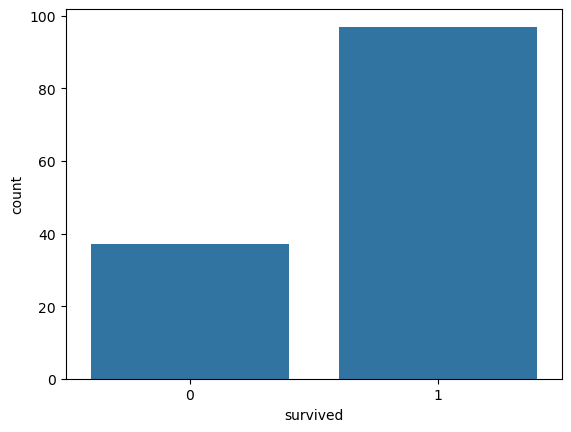

In [26]:
sns.countplot(x=family['survived'])
plt.show()

In [27]:
family.to_csv(r'C:\Users\KOLADE\OneDrive\Documents\Practices\Titanic\data\family.csv', index=False)

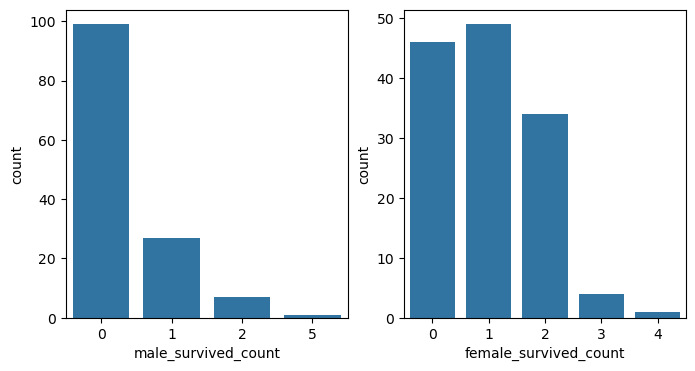

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

sns.countplot(x=family['male_survived_count'], ax=ax[0])
sns.countplot(x=family['female_survived_count'], ax=ax[1])

plt.show()

In [29]:
# df["Cabin"].apply(lambda x: "Unknown" if group["Cabin"].isna().all() else "Known")

### Conclusion

**Conclusion:**  
After Analysis;
1. There is no duplicate data
2. ['Age', 'Cabin', 'Embarked'] columns has missing value of [20%, 77%, 3%] respectively. To fill them - the Age column will be filled using the median Age grouped by Pclass and Sex because of the correletion found between them. The Cabin column has lots of missing datas so i will replace this with a new column as Cabin Status "Known" and "Unknown". The Embarked column will be filled using the mode there are only few data missing.
3. All continuous ['Age', 'Fare'] columns will be normalized, the discrete ['Pclass', 'SibSp', 'Parch'] columns will be used the way they are. The ['PassengerID'] will be dropped. The ['Survived'] is the dependent feature.
4. The categorical columns such as ['Sex', 'Cabin Status', 'Embarked'] will be encoded. A new column 'Title' will be gotten from the ['Name'] column before we drop it and encode the ['Title'] column. The ['Ticket'] column will be use to form a new data 'family' for descriptive analysis to see if passenger with lot of family survived by sticking together or not which i will then use to extract a new columns ['Family_count', 'Alone(if a passenger is alone or not)'] then we drop it before we proceed with the prediction. 
5. No Outliers will be removed in this data set.